In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import sklearn.preprocessing
import acquire
import wrangle

In [57]:
df = acquire.get_telco_data()

In [58]:
df = wrangle.wrangle_telco(df)

In [59]:
df

,customer_id,monthly_charges,tenure,total_charges
1793,0016-QLJIS,90.45,65,5957.90
1794,0017-DINOC,45.20,54,2460.55
1795,0019-GFNTW,45.05,56,2560.10
1796,0056-EPFBG,39.40,20,825.40
1797,0078-XZMHT,85.15,72,6316.20
...,...,...,...,...
7038,9950-MTGYX,20.30,28,487.95
7039,9953-ZMKSM,25.25,63,1559.30
7040,9964-WBQDJ,24.40,71,1725.40
7041,9972-EWRJS,19.25,67,1372.90


In [60]:
# splitting our data set to train, test, and validate

train_validate, test = train_test_split(df, test_size = .15, random_state = 123)
train, validate = train_test_split(train_validate, test_size = .15, random_state = 123)
train.shape, validate.shape, test.shape

((1217, 4), (215, 4), (253, 4))

In [61]:
train.total_charges.describe()

# we can see that the total charges varies a lot, so we must scale it inorder for it to have a proportionate impact 
# in our model

count    1217.000000
mean     3701.473870
std      2567.221506
min        20.350000
25%      1275.600000
50%      3533.600000
75%      5986.450000
max      8672.450000
Name: total_charges, dtype: float64

In [63]:
# cols_to_scale = ['monthly_charges', 'tenure', 'total_charges']
# train, test, validate = scale_data(train, test, validate, scaler = sklearn.preprocessing.MinMaxScaler(), cols_to_scale = cols_to_scale)

In [64]:
train

,customer_id,monthly_charges,tenure,total_charges
5510,9861-PDSZP,108.05,72,7806.60
5431,8041-TMEID,108.50,63,6991.90
2383,9443-JUBUO,65.25,72,4478.85
2381,9415-ZNBSX,89.00,70,6293.20
6670,3976-HXHCE,19.30,72,1414.80
...,...,...,...,...
6566,2481-SBOYW,25.00,61,1498.35
2148,5915-ANOEI,79.15,70,5536.50
6433,0505-SPOOW,19.80,70,1397.65
2406,9795-NREXC,85.00,64,5484.40


In [67]:
scaler = sklearn.preprocessing.MinMaxScaler()


scaler.fit(train[['monthly_charges']])


train = pd.concat([train, pd.DataFrame(scaler.transform(train[['monthly_charges']]),index = train.index,  columns = ['scaled_monthly_charges'])], axis = 1)


# df['reverse'] = scaler.inverse_transform(df[['scaled_monthly_charges']])


In [68]:
train

,customer_id,monthly_charges,tenure,total_charges,scaled_monthly_charges
5510,9861-PDSZP,108.05,72,7806.60,0.893373
5431,8041-TMEID,108.50,63,6991.90,0.897857
2383,9443-JUBUO,65.25,72,4478.85,0.466866
2381,9415-ZNBSX,89.00,70,6293.20,0.703538
6670,3976-HXHCE,19.30,72,1414.80,0.008969
...,...,...,...,...,...
6566,2481-SBOYW,25.00,61,1498.35,0.065770
2148,5915-ANOEI,79.15,70,5536.50,0.605381
6433,0505-SPOOW,19.80,70,1397.65,0.013951
2406,9795-NREXC,85.00,64,5484.40,0.663677


In [70]:
train = pd.concat([train, pd.DataFrame(scaler.inverse_transform(train[['scaled_monthly_charges']]), 
             index = train.index,  columns = ['reverse'])], axis = 1)

In [77]:
train[train.reverse != train.monthly_charges].shape

(149, 6)

In [78]:
train.dtypes

customer_id                object
monthly_charges           float64
tenure                      int64
total_charges             float64
scaled_monthly_charges    float64
reverse                   float64
dtype: object

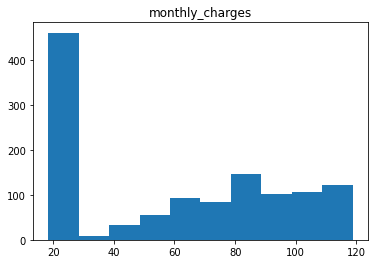

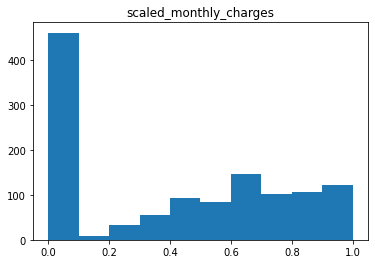

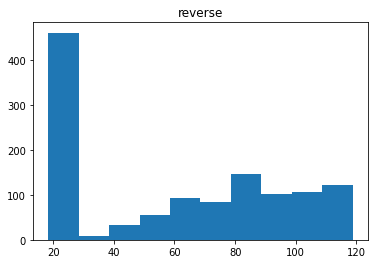

In [85]:
## visualizing the original, scaled, and reversed data

for col in ['monthly_charges', 'scaled_monthly_charges', 'reverse']:
    plt.hist(train[col])
    plt.title(col)
    plt.show()

In [92]:
## Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply 
#this scaler to your data. Visualize the result of your data scaling.


scaler = sklearn.preprocessing.QuantileTransformer(output_distribution = 'normal')


scaler = scaler.fit(train[['total_charges']])


train = pd.concat([train, pd.DataFrame(scaler.transform(train[['total_charges']]), index = train.index,
             columns = ['quantile_scaled_total_charges'])], axis = 1)

<AxesSubplot:ylabel='Frequency'>

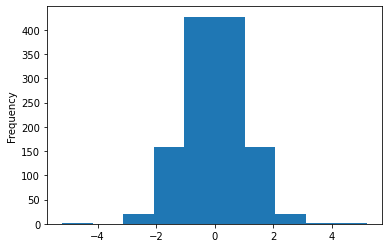

In [95]:
train.quantile_scaled_total_charges.plot.hist()

<AxesSubplot:ylabel='Frequency'>

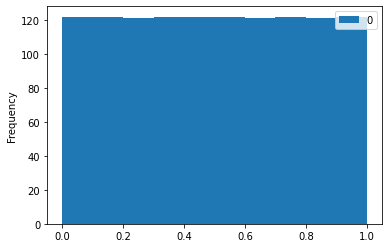

In [99]:
# the default output distribution for QuantileTransformer is uniform distribution

scaler = sklearn.preprocessing.QuantileTransformer()


scaler = scaler.fit(train[['total_charges']])


pd.DataFrame(scaler.transform(train[['total_charges']])).plot.hist()

In [101]:
#create a function that scales our data using the MinMaxScaler

def scale_data(train, test, validate, scaler, cols_to_scale):
    '''Intakes train, test, validate dataset, scaling methond, and the list of columns to scale
    and returns train, test, validate dataset with scaled data added to new columns'''

    
    new_cols = [col + "_scaled" for col in cols_to_scale]
    
    
    scaler = scaler.fit(train[cols_to_scale])
    
    train = pd.concat([train, pd.DataFrame(scaler.transform(train[cols_to_scale]), 
                                           index = train.index, columns = new_cols)], axis = 1)
    
    
    test =  pd.concat([test, pd.DataFrame(scaler.transform(test[cols_to_scale]), 
                                           index = test.index, columns = new_cols)], axis = 1)
    
    
    validate =  pd.concat([validate, pd.DataFrame(scaler.transform(validate[cols_to_scale]), 
                                           index = validate.index, columns = new_cols)], axis = 1)
                                        
                      
    return train, test, validate          